In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:90% !important;}
div.cell.code_cell.rendered{width:90%;}
div.input_prompt{padding:0px;}
div.CodeMirror {font-family:Consolas; font-size:10pt;}
div.text_cell_render.rendered_html{font-size:10pt;}
div.output {font-size:10pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:10pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:10pt;padding:5px;}
table.dataframe{font-size:10px;}
</style>
"""))

<b><font size="6" color="red">Ch 02. 딥러닝/머신러닝 입문 - 분류분석</font><b>

In [2]:
from tensorflow.keras.utils import to_categorical # 분류분석 시 원핫인코딩(추천)
import pandas as pd # 원핫인코딩 
from tensorflow.keras.models import Sequential, load_model #모델 생성, load
from tensorflow.keras.layers import Dense, Input
import numpy as np

# 0. 딥러닝
- 데이터의 규칙성을 추출하는 것
- 응용분야: 글씨인식, 문장분류, 예측, 질병진단, 얼굴인식
- ML/DL의 종류
    * 지도학습(독립=입력변수, 타깃=종속변수)
        * 분류분석(타깃변수가 category 변수. 다중분류 vs 이진분류) vs 회귀분석
    * 비지도학습(입력변수)
        * 군집화
    * 강화학습
- 지도학습에서의 딥러닝 프로그래밍 방식
    - 1. 데이터 확보 및 생성
    - 2. 데이터 전처리 : 스케일 조정, 훈련데이터셋(학습데이터셋), 검증데이터셋, 시험데이터셋, <b>+ 원핫인코딩<b>
    - 3. 모델 구성
    - 4. 모델 학습 과정 설계
    - 5. 모델 학습시키기(훈련, 검증데이터셋)
    - 6. 모델 평가하기(시험데이터셋)
    - 7. 모델 저장/사용하기(입력값 주고 예측값 받기)

# 1. 데이터셋 생성
# 2. 데이터 전처리

In [5]:
# 학습데이터 = 훈련데이터셋
x_train = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9]*10)
y_train = np.array([2, 4, 6, 8, 10, 12, 14, 16, 18]*10)
# 검증데이터, 시험데이터
x_val = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])
y_val = np.array([2, 4, 6, 8, 10, 12, 14, 16, 18])

In [11]:
# 인코딩 종류 - [라벨인코딩, 원핫인코딩]
    # - 라벨 인코딩 : 문자를 숫자로
    # - 원핫 인코딩 : [최대값]개(+0)의 열을 만들고, 해당 범주에 해당하는 열에만 1을, 나머지는 0을
data = np.array(['a', 'b', 'c', 'b', 'b'])
print('원 데이터: ', data)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
labeling_data = le.fit_transform(data)
print('라벨인코딩된 데이터: ', labeling_data)
one_hot_encoding_data = to_categorical(labeling_data) #숫자가 들어가야 하는 함수
print('원핫인코딩된 데이터:\n', one_hot_encoding_data)

원 데이터:  ['a' 'b' 'c' 'b' 'b']
라벨인코딩된 데이터:  [0 1 2 1 1]
원핫인코딩된 데이터:
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]]


In [15]:
#원핫인코딩(분류분석을 위한 target 변수)
data = np.array([1, 4, 5, 4, 5])
categorical_onehot = to_categorical(data) # numpy array
print('to_categorical 이용 \n', categorical_onehot)
getdummies_onehot = pd.get_dummies(data)
print('get_dummies 이용 \n', getdummies_onehot) # dataframe
print(type(categorical_onehot), type(getdummies_onehot))

to_categorical 이용 
 [[0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]]
get_dummies 이용 
    1  4  5
0  1  0  0
1  0  1  0
2  0  0  1
3  0  1  0
4  0  0  1
<class 'numpy.ndarray'> <class 'pandas.core.frame.DataFrame'>


In [17]:
# 분류분석을 위한 target 변수 원핫인코딩
Y_train = to_categorical(y_train, 19)
Y_val = to_categorical(y_val)

In [21]:
x_train.shape, Y_train.shape, x_val.shape, Y_val.shape

((90,), (90, 19), (9,), (9, 19))

# 3. 모델구성

In [22]:
model = Sequential()
#입력층
model.add(Input(shape=(1,)))
model.add(Dense(38, activation='sigmoid')) #활성화 함수: relu, elu, tanh, sigmoid

model.add(Dense(64, activation='elu'))
model.add(Dense(32, 'elu'))
#출력층
model.add(Dense(19, 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 38)                76        
                                                                 
 dense_1 (Dense)             (None, 64)                2496      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 19)                627       
                                                                 
Total params: 5,279
Trainable params: 5,279
Non-trainable params: 0
_________________________________________________________________


# 4. 모델 학습과정 설정
- 회귀분석에서의 loss : mse, rmse, mae
- 다중분류분석에서의 loss : categorical_crossentropy

In [23]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=['accuracy'])

# 5. 모델 학습시키기

In [24]:
hist = model.fit(x_train, Y_train, epochs=300, batch_size=10, validation_data=(x_val,Y_val), verbose=2)
# verbose=0 : 출력x, 1: 기본값 출력, 2: 에포크별 상세 로그 출력

Epoch 1/300
9/9 - 0s - loss: 2.8873 - accuracy: 0.1000 - val_loss: 2.6915 - val_accuracy: 0.2222 - 494ms/epoch - 55ms/step
Epoch 2/300
9/9 - 0s - loss: 2.6100 - accuracy: 0.2222 - val_loss: 2.5030 - val_accuracy: 0.2222 - 38ms/epoch - 4ms/step
Epoch 3/300
9/9 - 0s - loss: 2.4556 - accuracy: 0.2111 - val_loss: 2.3760 - val_accuracy: 0.2222 - 22ms/epoch - 2ms/step
Epoch 4/300
9/9 - 0s - loss: 2.3428 - accuracy: 0.2222 - val_loss: 2.2700 - val_accuracy: 0.2222 - 40ms/epoch - 4ms/step
Epoch 5/300
9/9 - 0s - loss: 2.2396 - accuracy: 0.2222 - val_loss: 2.1794 - val_accuracy: 0.2222 - 30ms/epoch - 3ms/step
Epoch 6/300
9/9 - 0s - loss: 2.1593 - accuracy: 0.2444 - val_loss: 2.0985 - val_accuracy: 0.2222 - 31ms/epoch - 3ms/step
Epoch 7/300
9/9 - 0s - loss: 2.0726 - accuracy: 0.2222 - val_loss: 2.0219 - val_accuracy: 0.2222 - 30ms/epoch - 3ms/step
Epoch 8/300
9/9 - 0s - loss: 1.9967 - accuracy: 0.2778 - val_loss: 1.9501 - val_accuracy: 0.3333 - 30ms/epoch - 3ms/step
Epoch 9/300
9/9 - 0s - loss: 1

Epoch 69/300
9/9 - 0s - loss: 0.3904 - accuracy: 1.0000 - val_loss: 0.3749 - val_accuracy: 1.0000 - 18ms/epoch - 2ms/step
Epoch 70/300
9/9 - 0s - loss: 0.3745 - accuracy: 1.0000 - val_loss: 0.3645 - val_accuracy: 1.0000 - 34ms/epoch - 4ms/step
Epoch 71/300
9/9 - 0s - loss: 0.3726 - accuracy: 0.9000 - val_loss: 0.3550 - val_accuracy: 1.0000 - 29ms/epoch - 3ms/step
Epoch 72/300
9/9 - 0s - loss: 0.3664 - accuracy: 1.0000 - val_loss: 0.3532 - val_accuracy: 1.0000 - 18ms/epoch - 2ms/step
Epoch 73/300
9/9 - 0s - loss: 0.3579 - accuracy: 1.0000 - val_loss: 0.3386 - val_accuracy: 1.0000 - 34ms/epoch - 4ms/step
Epoch 74/300
9/9 - 0s - loss: 0.3403 - accuracy: 0.9556 - val_loss: 0.3257 - val_accuracy: 1.0000 - 39ms/epoch - 4ms/step
Epoch 75/300
9/9 - 0s - loss: 0.3528 - accuracy: 1.0000 - val_loss: 0.3291 - val_accuracy: 1.0000 - 30ms/epoch - 3ms/step
Epoch 76/300
9/9 - 0s - loss: 0.3687 - accuracy: 0.8889 - val_loss: 0.3436 - val_accuracy: 0.8889 - 28ms/epoch - 3ms/step
Epoch 77/300
9/9 - 0s - 

Epoch 136/300
9/9 - 0s - loss: 0.0597 - accuracy: 1.0000 - val_loss: 0.0571 - val_accuracy: 1.0000 - 29ms/epoch - 3ms/step
Epoch 137/300
9/9 - 0s - loss: 0.0553 - accuracy: 1.0000 - val_loss: 0.0522 - val_accuracy: 1.0000 - 31ms/epoch - 3ms/step
Epoch 138/300
9/9 - 0s - loss: 0.0515 - accuracy: 1.0000 - val_loss: 0.0518 - val_accuracy: 1.0000 - 23ms/epoch - 3ms/step
Epoch 139/300
9/9 - 0s - loss: 0.0521 - accuracy: 1.0000 - val_loss: 0.0483 - val_accuracy: 1.0000 - 22ms/epoch - 2ms/step
Epoch 140/300
9/9 - 0s - loss: 0.0483 - accuracy: 1.0000 - val_loss: 0.0470 - val_accuracy: 1.0000 - 33ms/epoch - 4ms/step
Epoch 141/300
9/9 - 0s - loss: 0.0476 - accuracy: 1.0000 - val_loss: 0.0456 - val_accuracy: 1.0000 - 33ms/epoch - 4ms/step
Epoch 142/300
9/9 - 0s - loss: 0.0463 - accuracy: 1.0000 - val_loss: 0.0450 - val_accuracy: 1.0000 - 33ms/epoch - 4ms/step
Epoch 143/300
9/9 - 0s - loss: 0.0459 - accuracy: 1.0000 - val_loss: 0.0448 - val_accuracy: 1.0000 - 34ms/epoch - 4ms/step
Epoch 144/300
9/

Epoch 203/300
9/9 - 0s - loss: 0.0117 - accuracy: 1.0000 - val_loss: 0.0115 - val_accuracy: 1.0000 - 37ms/epoch - 4ms/step
Epoch 204/300
9/9 - 0s - loss: 0.0117 - accuracy: 1.0000 - val_loss: 0.0113 - val_accuracy: 1.0000 - 29ms/epoch - 3ms/step
Epoch 205/300
9/9 - 0s - loss: 0.0115 - accuracy: 1.0000 - val_loss: 0.0111 - val_accuracy: 1.0000 - 28ms/epoch - 3ms/step
Epoch 206/300
9/9 - 0s - loss: 0.0111 - accuracy: 1.0000 - val_loss: 0.0109 - val_accuracy: 1.0000 - 18ms/epoch - 2ms/step
Epoch 207/300
9/9 - 0s - loss: 0.0110 - accuracy: 1.0000 - val_loss: 0.0107 - val_accuracy: 1.0000 - 33ms/epoch - 4ms/step
Epoch 208/300
9/9 - 0s - loss: 0.0108 - accuracy: 1.0000 - val_loss: 0.0105 - val_accuracy: 1.0000 - 39ms/epoch - 4ms/step
Epoch 209/300
9/9 - 0s - loss: 0.0105 - accuracy: 1.0000 - val_loss: 0.0104 - val_accuracy: 1.0000 - 28ms/epoch - 3ms/step
Epoch 210/300
9/9 - 0s - loss: 0.0105 - accuracy: 1.0000 - val_loss: 0.0102 - val_accuracy: 1.0000 - 45ms/epoch - 5ms/step
Epoch 211/300
9/

Epoch 270/300
9/9 - 0s - loss: 0.0044 - accuracy: 1.0000 - val_loss: 0.0043 - val_accuracy: 1.0000 - 19ms/epoch - 2ms/step
Epoch 271/300
9/9 - 0s - loss: 0.0043 - accuracy: 1.0000 - val_loss: 0.0042 - val_accuracy: 1.0000 - 34ms/epoch - 4ms/step
Epoch 272/300
9/9 - 0s - loss: 0.0042 - accuracy: 1.0000 - val_loss: 0.0042 - val_accuracy: 1.0000 - 38ms/epoch - 4ms/step
Epoch 273/300
9/9 - 0s - loss: 0.0042 - accuracy: 1.0000 - val_loss: 0.0041 - val_accuracy: 1.0000 - 30ms/epoch - 3ms/step
Epoch 274/300
9/9 - 0s - loss: 0.0041 - accuracy: 1.0000 - val_loss: 0.0041 - val_accuracy: 1.0000 - 30ms/epoch - 3ms/step
Epoch 275/300
9/9 - 0s - loss: 0.0041 - accuracy: 1.0000 - val_loss: 0.0040 - val_accuracy: 1.0000 - 30ms/epoch - 3ms/step
Epoch 276/300
9/9 - 0s - loss: 0.0040 - accuracy: 1.0000 - val_loss: 0.0040 - val_accuracy: 1.0000 - 18ms/epoch - 2ms/step
Epoch 277/300
9/9 - 0s - loss: 0.0040 - accuracy: 1.0000 - val_loss: 0.0039 - val_accuracy: 1.0000 - 34ms/epoch - 4ms/step
Epoch 278/300
9/

# 6. 모델 평가하기
모델 학습과정 살펴보고 evaluate

In [26]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

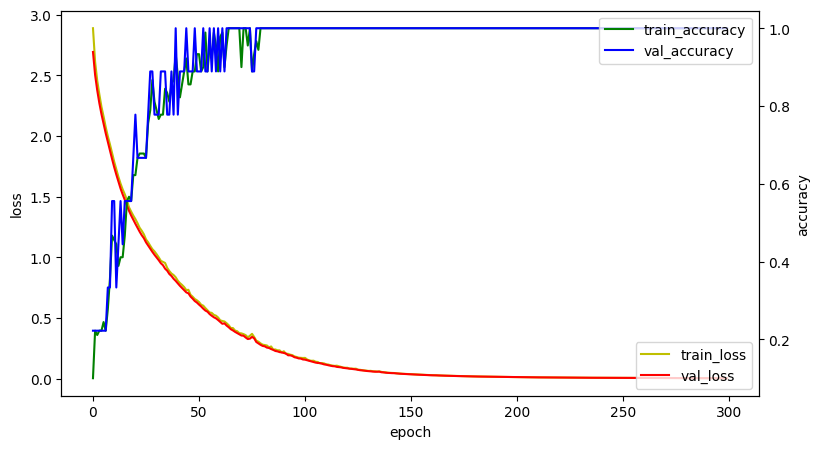

In [35]:
# 모델 학습 과정 표시하기
import matplotlib.pyplot as plt
fig, loss_ax = plt.subplots(figsize=(9,5))
loss_ax.plot(hist.history['loss'], 'y', label='train_loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val_loss')
acc_ax = loss_ax.twinx() # loss_ax 축과 x축(epochs) 공유하는 acc_ax 생성
acc_ax.plot(hist.history['accuracy'], 'g', label='train_accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'b', label='val_accuracy')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(loc='lower right')
acc_ax.legend(loc='upper right')
plt.show()

In [37]:
# 모델 평가하기 - 테스트데이터셋으로 모델 학습 설정 과정의 loss, metrics로 평가
score = model.evaluate(x_val, Y_val, batch_size=3) # validation data로 퉁치자 이번엔
print('loss: ', score[0])
print('accuracy: ', score[1])

3/3 [==============================] - 0s 2ms/step - loss: 0.0030 - accuracy: 1.0000
loss:  0.0030374026391655207
accuracy:  1.0


# 7. 모델 사용하기
모델을 이용해 예측하기

In [42]:
H = model.predict(np.array([2]))
H

1/1 [==============================] - 0s 24ms/step


array([[5.5496270e-24, 8.6616188e-25, 4.5293296e-04, 2.7482422e-22,
        9.9893790e-01, 2.0921039e-19, 6.0914858e-04, 3.4248782e-29,
        1.3929086e-11, 3.1380286e-22, 1.8125507e-24, 3.0203518e-26,
        9.8771034e-24, 1.5787753e-19, 1.3271406e-35, 2.5966172e-31,
        0.0000000e+00, 1.2963939e-18, 0.0000000e+00]], dtype=float32)

In [41]:
model.predict(np.array([2])).argmax()

1/1 [==============================] - 0s 15ms/step


4

In [43]:
H[0, H.argmax()]*100

99.89379048347473

In [45]:
# 2, 4, 6의 확률
H[0, [2,4,6]]*100

array([4.5293298e-02, 9.9893791e+01, 6.0914859e-02], dtype=float32)

# + 저장하기

In [46]:
model.save('model/02_deep.h5')

In [47]:
# 저장된 모델 사용하기
model1 = load_model('model/02_deep.h5')

In [48]:
model1.predict(np.array([[3]])).argmax()

1/1 [==============================] - 0s 50ms/step


6